In [1]:
import geopandas as gpd
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# gdf = gpd.read_file('./indicador/CompletoIndicad.shp')
datafile = './data/indicadores.csv'
data = pd.read_csv(datafile)

In [3]:
NAMES_INDEX = {
	'IA01': ['iA01_DenHa','iA01_DenHab','A01 Densidad neta de habitantes'],
	'IA02': ['iA02_DenVi','iA02_DenViv','A02 Densidad neta de viviendas'],
	'IA03': ['iA03_Compa','iA03_Compac','A03 Compacidad absoluta'],
# 	'IA04': ['iA04_EficTerrit','iA04_EficTerrit','A04 Eficiencia en el uso del territorio'],
	'IA05': ['iA05_PredV','iA05_PredVaci','A05 Área de predios vacíos'],
# 	'IA06': ['iA06_PropCalle','iA06_PropCalle','A06 Proporción de la calle'],
	'IA07': ['iA07_Equip','iA07_EquipUrba','A07 Proximidad a servicios urbanos básicos'],
	'IA08': ['iA08_ProxE','iA08_ProxEPA','A08 Proximidad al espacio público abierto'],
	'IA09': ['iA09_ActCo','iA09_ActComCot','A09 Cobertura de actividades comerciales cotinianas'],
	'IA10': ['iA10_RelaA','iA10_RelaActViv','A10 Relación entre actividad y residencia'],
	'IA11': ['iA11_CompU','iA11_CompUrba','A11 Complejidad urbana'],
	'IA12': ['iA12_DenIn','iA12_DenInterPea','A12 Densidad de intersecciones peatonales'],
	'IA13': ['iA13_Siner','iA13_Sinerg','A13 Sinergia'],
	'IB01': ['iB01_CaliA','iB01_CalAire','B01 Calidad del aire'],
	'IB02': ['iB02_IlumV','iB02_IlumVia','B02 Luminación nocturna del viario público'],
	'IB03': ['iB03_ContA','iB03_ContAcus','B03 Confort acústico'],
	'IB04': ['B04_ProxVe','iB04_ProxVerd','B04 Proximidad al espacio verde público más cercano'],	
	'IB05': ['iB05_SupVe','iB05_SupVerHab','B05 Superficie verde por habitante'],
# 	'IB06': ['iB06_SupAgri','iB06_SupAgri','B06 Superficie de área agrícola/huertos'],	
	'IB07': ['iB07_PermS','iB07_PermSue','B07 Permeabilidad del suelo'],
# 	'IC01': ['iC01_RepaVia','iC01_RepaVia','C01 Reparto del viario público peatonal'],
	'IC03': ['iC03_ViasH','iC03_ViasHab','C03 Vías públicas por habitante'],
	'IC04': ['iC04_ProxT','iC04_ProxTranAlt','C04 Proximidad a redes de transporte alternativo'],
# 	'IC05': ['iC05_EspaParq','iC05_EspaParq','C05 Espacio público ocupado por vehículos parqueados'],
	'IC09': ['iC09_ConEl','iC09_ConElecViv','C09 Consumo de energía eléctrica en la vivienda' ],
	'IC13': ['iC13_CobAl','iC13_CobAlcan','C13 Cobertura del sistema de servicio de alcantarillado'],
	'ID01': ['iD01_CobSe','iD01_CobServBas','D01 Viviendas con cobertura total de servicios básicos'],
	'ID02': ['iD02_Caren','iD02_CarenConst','D02 Viviendas con carencias constructivas'],
	'ID03': ['iD03_ZonRi','iD03_ZonRiesgo','D03 Viviendas emplazadas en zonas vulnerables y de riesgo'],
# 	'ID04': ['iD04_EPAMejoras','iD04_EPAMejoras','D04 Espacios públicos abiertos que necesitan mejoras'],
	'ID05': ['iD05_AccIn','iD05_AccInter','D05 Acceso a internet'],
	'ID06': ['iD06_UsoTi','iD06_UsoTiemp','D06 Uso del tiempo'],	
	'ID07': ['iD07_IndCa','iD07_IndCaliVida','D07 Indice de calidad de vida'],
	'ID08': ['iD08_AccAl','iD08_AccAlim','D08 Cercanía y asequibilidad a alimentos'],
	'ID09': ['iD09_Robos','iD09_Robos','D09 Robos por número de habitantes'],
	'ID10': ['iD10_Tenen','iD10_TenenViv','D10 Seguridad de tenencia de la vivienda'],
	'ID11': ['iD11_Desem','iD11_Desemp','D11 Tasa de desempleo'],	
	'ID12': ['iD12_MujeT','iD12_MujeTrab','D12 Mujeres en la fuerza de trabajo remunerado'],	
	'ID13': ['iD13_EstUn','iD13_EstUniv','D13 Población activa con estudios universitarios'],
	'ID14': ['iD14_Estab','iD14_EstabComu','D14 Estabilidad de la comunidad'],	
	'ID15': ['iD15_PercI','iD15_PercInseg','D15 Percepción de inseguridad'],	
	'ID16': ['iD16_IndiE','iD16_IndiEnvej','D16 Índice de envejecimiento'],
	'ID17': ['iD17_SegrE','iD17_SegrEspa','D17 Segregación Espacial']
}

In [4]:
INDICADORES_NOMBRES = []
for key in NAMES_INDEX:
    name_indicator = NAMES_INDEX[key][0]
    INDICADORES_NOMBRES.append(name_indicator)

# INDICADORES_NOMBRES

In [105]:
# sns.set(style="white", palette="muted", color_codes=True)
# fig, axs = plt.subplots(ncols=3, nrows=int(len(NAMES_INDEX)/3) + 1, figsize=(14, 8))
# fig.suptitle(r'$\it{Indicadores}$ $\it{crudos.}$')

# dataNotNull = data[NAMES_INDEX['IA01'][0]].dropna()
# dataNotNull[:]
# sns.distplot(dataNotNull, kde=True, color="b", ax=axs[0], hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "k"})
# sns.distplot(data[NAMES_INDEX['IA02'][0]], kde=True, color="b", ax=axs[1], hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "k"})

In [129]:
# dataNotNull = data[NAMES_INDEX['IA01'][0]].dropna()
# dataNotNull[:]

In [165]:
# data[NAMES_INDEX['IA01'][0]]

/Users/terra/opt/anaconda3/envs/statsisurbano/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/terra/opt/anaconda3/envs/statsisurbano/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/terra/opt/anaconda3/envs/statsisurbano/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/terra/opt/anaconda3/envs/statsisurbano/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/terra/opt/anaconda3/envs/statsisurbano/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0

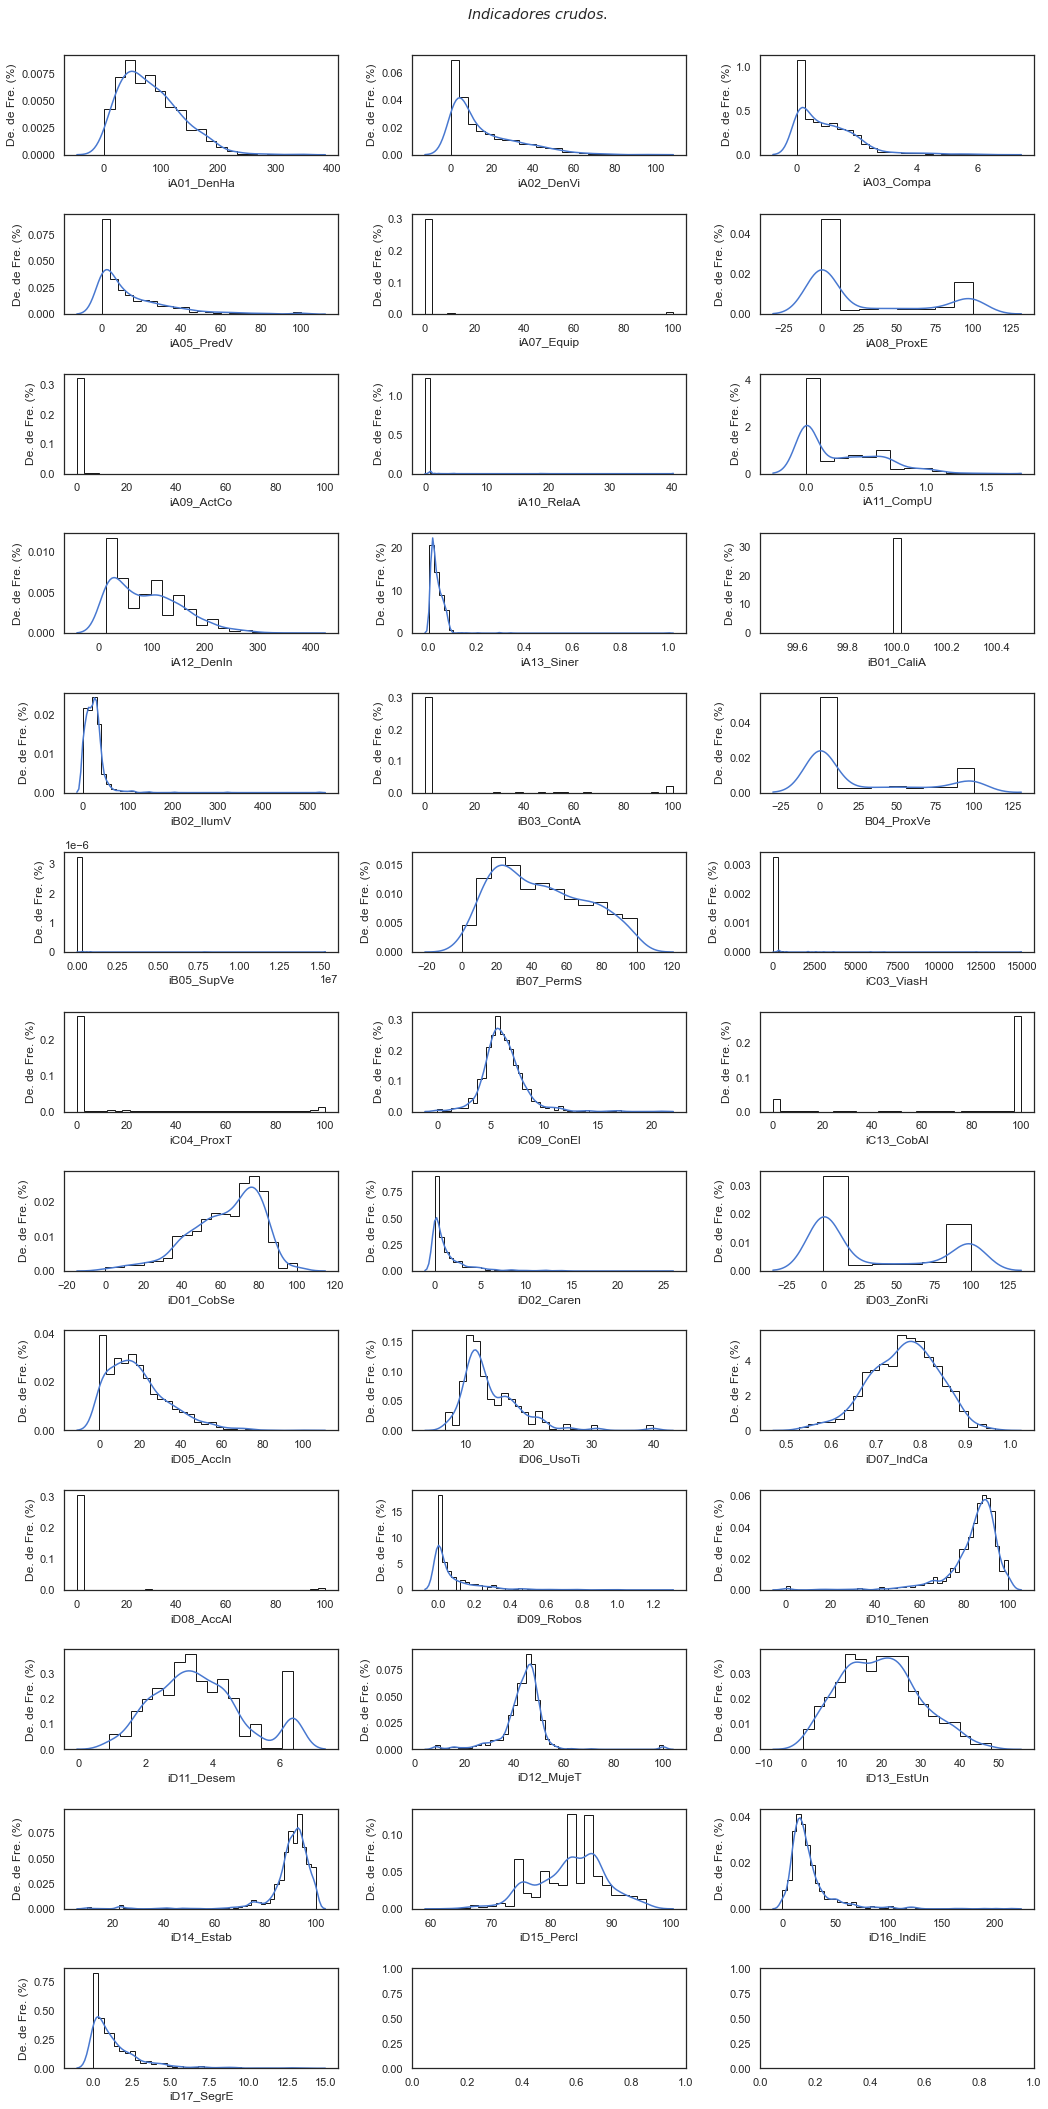

In [5]:
sns.set(style="white", palette="muted", color_codes=True)
fig, axs = plt.subplots(ncols=3, nrows=int(len(NAMES_INDEX)/3) + 1, figsize=(15, 30))
fig.suptitle(r'$\it{Indicadores}$ $\it{crudos.}$')
fig.tight_layout(pad=3.0)
x = 0
y = 0
for key in NAMES_INDEX:
    name_indicator = NAMES_INDEX[key][0]
    dataNotNull = data[name_indicator].dropna()
    if(x<3):
        sns.distplot(dataNotNull, kde=True, color="b", ax=axs[y,x], hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "k"})
       
        axs[y,x].set_ylabel("De. de Fre. (%)")
#         axs[y,x].set_xlabel("Den. de Fre. (%)")
    x+= 1
    if(x is 3):
        x = 0
        y+= 1
        

    

In [163]:
# sns.set(style="white", palette="muted", color_codes=True)
# fig, axs = plt.subplots(ncols=3, nrows=int(len(NAMES_INDEX)/3) + 1, figsize=(14, 8))
# fig.suptitle(r'$\it{Indicadores}$ $\it{crudos.}$')
# dataNotNull = data[NAMES_INDEX['IA01'][0]].dropna()
# sns.distplot(dataNotNull, kde=True, color="b", ax=axs[0,1], hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "k"})

In [127]:
data.groupby(['Tipologia'])[INDICADORES_NOMBRES].count()

,iA01_DenHa,iA02_DenVi,iA03_Compa,iA05_PredV,iA07_Equip,iA08_ProxE,iA09_ActCo,iA10_RelaA,iA11_CompU,iA12_DenIn,...,iD08_AccAl,iD09_Robos,iD10_Tenen,iD11_Desem,iD12_MujeT,iD13_EstUn,iD14_Estab,iD15_PercI,iD16_IndiE,iD17_SegrE
Tipologia,,,,,,,,,,,,,,,,,,,,,
A,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
B,3,66,66,66,66,66,66,66,22,50,...,66,66,66,66,66,66,66,66,66,66
C,3,5,5,5,5,5,5,5,4,5,...,5,5,5,5,5,5,5,5,5,5
D,15,40,40,40,40,40,40,40,29,22,...,40,40,40,38,40,40,40,40,40,40
G,31,130,130,130,129,129,129,129,69,77,...,129,130,129,118,129,129,129,130,126,129
J,31,73,73,73,73,73,73,73,63,63,...,73,73,73,73,73,73,73,73,73,73
K,15,35,35,35,35,35,35,35,27,23,...,35,35,35,32,35,35,35,35,35,35
M,71,110,110,110,109,109,109,109,93,100,...,109,110,109,99,109,109,109,110,109,109
N,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


{'IA01': ['iA01_DenHa', 'iA01_DenHab', 'A01 Densidad neta de habitantes'],
 'IA02': ['iA02_DenVi', 'iA02_DenViv', 'A02 Densidad neta de viviendas'],
 'IA03': ['iA03_Compa', 'iA03_Compac', 'A03 Compacidad absoluta'],
 'IA05': ['iA05_PredV', 'iA05_PredVaci', 'A05 Área de predios vacíos'],
 'IA07': ['iA07_Equip',
  'iA07_EquipUrba',
  'A07 Proximidad a servicios urbanos básicos'],
 'IA08': ['iA08_ProxE',
  'iA08_ProxEPA',
  'A08 Proximidad al espacio público abierto'],
 'IA09': ['iA09_ActCo',
  'iA09_ActComCot',
  'A09 Cobertura de actividades comerciales cotinianas'],
 'IA10': ['iA10_RelaA',
  'iA10_RelaActViv',
  'A10 Relación entre actividad y residencia'],
 'IA11': ['iA11_CompU', 'iA11_CompUrba', 'A11 Complejidad urbana'],
 'IA12': ['iA12_DenIn',
  'iA12_DenInterPea',
  'A12 Densidad de intersecciones peatonales'],
 'IA13': ['iA13_Siner', 'iA13_Sinerg', 'A13 Sinergia'],
 'IB01': ['iB01_CaliA', 'iB01_CalAire', 'B01 Calidad del aire'],
 'IB02': ['iB02_IlumV',
  'iB02_IlumVia',
  'B02 Lu

In [158]:
# Initialize a grid of plots with an Axes for each walk
# g = sns.FacetGrid(data, col="iA01_DenHa", height=4, aspect=.5)
# g = g.map(plt.hist, "iA01_DenHa", bins=bins)